Can I animate a spinning pceb?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import animation
import mplcyberpunk
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib import transforms
from matplotlib.collections import PatchCollection
# from matplotlib.patches import Wedge

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
#cc cet
m1 = 0.441*u.Msun
m2 = 0.18*u.Msun
p= 6.8818*u.hr
r1 = 0.0179*u.Rsun
r2 = 0.243*u.Rsun

In [3]:
def p_to_a(m1, m2, p):
    m1, m2, p = m1.to(u.kg), m2.to(u.kg), p.to(u.s)
    a = ((const.G*(m1+m2) * p**2)/(4*np.pi**2))**(1/3)
    return a

a = p_to_a(m1, m2, p)
a = a.to(u.Rsun)
print(a) #yay right answer

def com(m1, m2, a): #find the distances to a COM
    r1 = a / (1 + (m1/m2))
    r2 = a - r1
    return r1, r2

a1, a2 = com(m1, m2, a)
print(a1, a2)

a1, a2 = a1.value, a2.value

1.5612131270208132 solRad
0.4525255440640038 solRad 1.1086875829568092 solRad


https://stackoverflow.com/questions/51286455/how-can-i-animate-a-point-moving-around-the-circumference-of-a-circle

In [4]:
"""
r_1 = r1.value # radius of circle
r_2 = r2.value
def circle1(phi):
    return np.array([r_1*np.cos(phi), r_1*np.sin(phi)])

def circle2(phi):
    return np.array([r_2*np.cos(phi), r_2*np.sin(phi)])

# create a figure with an axes
fig, ax = plt.subplots(figsize=(5,5))
# set the axes limits
ax.axis([-1.5,1.5,-1.5,1.5])
# set equal aspect such that the circle is not shown as ellipse
ax.set_aspect("equal")
# create a point in the axes
#point1, = ax.plot(0,1, marker="o", ms=5)
point1 = plt.Circle((0,1), radius=0.5)

# point2, = ax.plot(0,1, marker="o",ms=10)

# Updating function, to be repeatedly called by the animation
def update(phi):
    # obtain point coordinates 
    x1,y1 = circle1(phi)
    x2,y2 = circle2(phi+np.pi)
    # set point's coordinates
    point1.set_x=(x1)
    point1.set_y=(y1)
    
#     point2.set_data([x2],[y2])
    return point1#, point2

# create animation with 10ms interval, which is repeated,
# provide the full circle (0,2pi) as parameters
#anim = FuncAnimation(fig, update, interval=1, blit=True, repeat=True, frames=np.linspace(0,2*np.pi,2, endpoint=False))

#anim.save('animations/test_circle.gif', dpi=100, writer='imagemagick')
#plt.show()"""

'\nr_1 = r1.value # radius of circle\nr_2 = r2.value\ndef circle1(phi):\n    return np.array([r_1*np.cos(phi), r_1*np.sin(phi)])\n\ndef circle2(phi):\n    return np.array([r_2*np.cos(phi), r_2*np.sin(phi)])\n\n# create a figure with an axes\nfig, ax = plt.subplots(figsize=(5,5))\n# set the axes limits\nax.axis([-1.5,1.5,-1.5,1.5])\n# set equal aspect such that the circle is not shown as ellipse\nax.set_aspect("equal")\n# create a point in the axes\n#point1, = ax.plot(0,1, marker="o", ms=5)\npoint1 = plt.Circle((0,1), radius=0.5)\n\n# point2, = ax.plot(0,1, marker="o",ms=10)\n\n# Updating function, to be repeatedly called by the animation\ndef update(phi):\n    # obtain point coordinates \n    x1,y1 = circle1(phi)\n    x2,y2 = circle2(phi+np.pi)\n    # set point\'s coordinates\n    point1.set_x=(x1)\n    point1.set_y=(y1)\n    \n#     point2.set_data([x2],[y2])\n    return point1#, point2\n\n# create animation with 10ms interval, which is repeated,\n# provide the full circle (0,2pi) as 

Didn't work, this looks more promising https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

In [5]:
#stars https://github.com/jamescalam/python_synthwave
def make_stars(min_x, max_x, min_y, max_y, stars=100):
    y = np.random.uniform(min_y, max_y, stars)
    x = np.random.uniform(min_x, max_x, stars)
    alpha_multiplier = np.random.uniform(.5, 1, len(x))
    size = np.random.uniform(1, 6, len(x))

    return np.array([x, y, alpha_multiplier, size]).T

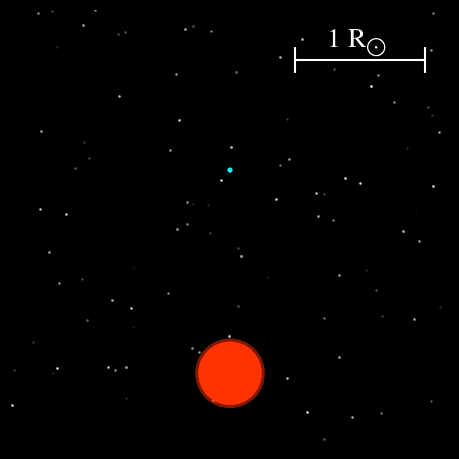

In [6]:
#plt.style.use("cyberpunk")
#rcParams["axes.linewidth"]=1

fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)

#fig.set_size_inches(7, 6.5)
plot_rad = 1.69
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

ax.set_aspect("equal")
patch1 = plt.Circle((0, a1), r1.value, fc='#08F7FE')
patch2 = plt.Circle((0, a2), r2.value, fc='#ff3300')

patch1a = plt.Circle((0, a1), r1.value*1.1, fc='#08F7FE', alpha=0.3)
patch2a = plt.Circle((0, a2), r2.value*1.1, fc='#ff3300',alpha=0.3)

def init():
    patch1.center = (0, a1)
    patch2.center = (0, -a2)
    patch1a.center = (0, a1)
    patch2a.center = (0, -a2)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch1a)
    ax.add_patch(patch2a)
    return patch1, patch2, patch1a, patch2a

def animate(phi):
    x, y = patch1.center
    x, y = a1* np.cos(phi), a1*np.sin(phi)
    patch1.center = (x, y)
    patch1a.center = (x, y)
    x, y = patch2.center
    x, y = a2* np.cos(phi+np.pi), a2*np.sin(phi+np.pi)
    patch2.center = (x, y)
    patch2a.center = (x, y)
    
    
    
    
    return patch1, patch2, patch1a, patch2a

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, 360, endpoint=False), 
                               interval=20,
                               blit=True)

col= '#000033'
bgcol ='#000033'
col='k'
bgcol='k'
fig.patch.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.spines['bottom'].set_color(col)
ax.spines['top'].set_color(col) 
ax.spines['right'].set_color(col)
ax.spines['left'].set_color(col)
#plt.grid(zorder=-10)
# plt.xlabel(r'X (R$_{\bigodot}$)')
# plt.ylabel(r'Y (R$_{\bigodot}$)')
plt.xticks(visible=False)
plt.yticks(visible=False)

labely = 1.3
labelx= 0.5
plt.errorbar((labelx, labelx+1), (labely, labely), yerr=0.1, c='w')
plt.annotate(r'1 R$_{\bigodot}$', (labelx+0.5, labely+0.1), ha='center', c='w')



stars = make_stars(-plot_rad, plot_rad, -plot_rad, plot_rad)
for star in stars:
        alpha = np.random.uniform(0, 1)
        ax.scatter(star[0], star[1], s=star[2], alpha=alpha,
                   c='#ffffff', zorder=0)
        dark = np.random.uniform(0, .3)
        ax.scatter(star[0], star[1], s=star[2], alpha=dark,
                   c='#000000', zorder=0)
        
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, 4, endpoint=False), 
                               interval=100,
                               blit=True)

        
# anim.save('animations/test_circle_v2.gif', dpi=100, writer='imagemagick')
plt.show()

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

#anim.save('animations/test2.mp4', writer=writer)


In [7]:
def make_sun(ax, cx, cy, r, angle):
    tr = transforms.Affine2D().rotate_deg(angle)
    def make_grad(cx, cy, r, alpha):
        circ = mpatches.Circle((cx, cy), r, facecolor='none')
        ax.add_patch(circ)

        plt.imshow([[1, 1], [0, 0]],
                   cmap=cm.YlOrRd,
                   interpolation='bicubic',
                   aspect='auto',
                   extent=(cx-r, cx+r, cy-r, cy+r),
                   alpha=alpha,
                   clip_path=circ,
                   clip_on=True,
                  transform=tr + ax.transData)

    make_grad(cx, cy, r*1.01, alpha=.4)
    make_grad(cx, cy, r*1.02, alpha=.4)
    make_grad(cx, cy, r*1.03, alpha=.4)
    make_grad(cx, cy, r*1.04, alpha=.4)
    make_grad(cx, cy, r*1., alpha=1)



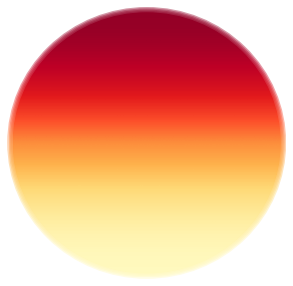

In [8]:
fig = plt.subplots(figsize=(5,5))
plot_rad = r2.value
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))
make_sun(ax, 0, 0, plot_rad/1.04, 0)
ax.axis('off')
plt.savefig('animations/sun.png')
 

AttributeError: 'PatchCollection' object has no property 'alphas'

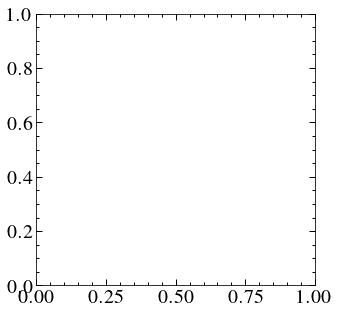

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = [0.1, 0.1, 0.1,1]
patches = []
alphas= [0.1, 0.5, 1]
for x1, y1, r, a in zip(x, y, radii, alphas):
    circle = mpatches.Circle((x1, y1), r, alpha=a, facecolor='r')
    patches.append(circle)



colors = [1, 2,3]
p = PatchCollection(patches, facecolors='r', alphas=alphas)
# p.set_array(np.array(colors))
ax.add_collection(p)

plt.show()


In [ ]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)


fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)


plot_rad = 1.69

# Define a 1st position to annotate (display it with a marker)
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

ax.set_aspect("equal")



arr_img = plt.imread('animations/sun.png', format='png')

imagebox = OffsetImage(arr_img, zoom=0.1)
# imagebox.image.axes = ax

tr = transforms.Affine2D().rotate_deg(2)

# imagebox = imagebox.gettransform=tr+ ax.transData

ab = AnnotationBbox(imagebox, (0,0),
                    xycoords='data',
                    frameon=False,
                    )


ax.add_artist(ab)
ax.set_facecolor(bgcol)
plt.axhline(0, c='r')

In [ ]:


circles = []
circle1 = mpatches.Circle((0, 0), 0.1, alpha=1, facecolor='r')
circles.append(circle1)
circle2 = mpatches.Circle((0, 0), 0.2, alpha=0.5, facecolor='r')
circles.append(circle2)

fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)


plot_rad = 1.69

# Define a 1st position to annotate (display it with a marker)
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

ax.set_aspect("equal")

for circ in circles:
    ax.add_patch(circ)

for circ in circles:
    circ.center=(0,1)
    ax.add_patch(circ)
    
ax.set_facecolor('k')




With wedges

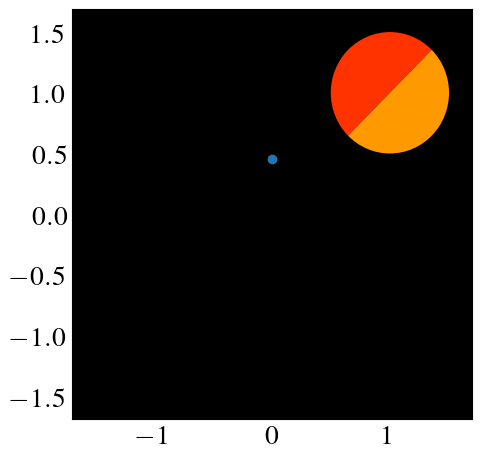

In [127]:
fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)


plot_rad = 1.69

# Define a 1st position to annotate (display it with a marker)
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

angle=45
center =1,1
radius = 0.5
theta1, theta2 = angle, angle + 180
#c1 =plt.Circle(center, radius, fc='#801a00')
w1 = Wedge(center, radius, theta1, theta2, fc='#ff3300')
w2 = Wedge(center, radius, theta2, theta1, fc='#ff9900')
for wedge in [ w1, w2]:
    ax.add_artist(wedge)


x, y = a1* np.cos(np.pi/2), a1*np.sin(np.pi/2)
plt.scatter(x,y)
ax.set_facecolor('k')


In [24]:
windrad =10

[0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5
 0.  0.5 1.  1.5 2.  2.5 0.  0.5 1.  1.5 2.  2.5 0.

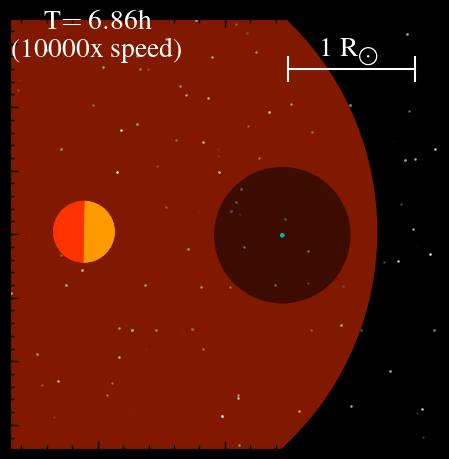

In [58]:
#plt.style.use("cyberpunk")
#rcParams["axes.linewidth"]=1

fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)

speedx = 10000
nframes = 360
windrad= np.tile([0,0.5,1,1.5,2,2.5], int((nframes/6))+1)
# print(windrad)

#fig.set_size_inches(7, 6.5)
plot_rad = 1.69
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

ax.set_aspect("equal")
patch1 = plt.Circle((0, a1), r1.value, fc='#08F7FE')
#patch2 = plt.Circle((0, a2), r2.value, fc='#ff3300')
patch2 = mpatches.Wedge((0, -a2), r2.value, 0, 180, fc='#ff9900')
patch3 = mpatches.Wedge((0, -a2), r2.value, 180, 0, fc='#ff3300')


patch1a = plt.Circle((0, a1), r1.value*30, fc='k', alpha=0.3)
patch2a = plt.Circle((0, a2), r2.value*10, fc='#ff3300',alpha=0.3, zorder=-10)

labely = 1.3
labelx= 0.5
plt.errorbar((labelx, labelx+1), (labely, labely), yerr=0.1, c='w')
plt.annotate(r'1 R$_{\bigodot}$', (labelx+0.5, labely+0.1), ha='center', c='w')

an = ax.annotate('', (labelx-1.5, labely+0.1), ha='center', c='w')



def init():
    patch1.center = (0, a1)
    patch2.center = (0, -a2)
    patch3.center = (0, -a2)
    patch1a.center = (0, a1)
    patch2a.center = (0, -a2)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch1a)
    ax.add_patch(patch2a)
    return patch1, patch2, patch1a, patch2a, patch3

def animate(phi, windrad):
    x, y = patch1.center
    x, y = a1* np.cos(phi), a1*np.sin(phi)
    patch1.center = (x, y)
    patch1a.center = (x, y)
    x, y = patch2.center
    x, y = a2* np.cos(phi+np.pi), a2*np.sin(phi+np.pi)
    patch2.center = (x, y)
    patch3.center = (x, y)
    phid = (phi*(180/np.pi))+180
#     print(phid)
    theta1 = phid+90
    theta2 = phid+270
    if phid > 90 or phid >= 270:
        patch2.theta1 = theta1
        patch2.theta2 = theta2
        patch3.theta1 = theta2
        patch3.theta2 = theta1
    else:
        patch2.theta1 = theta2
        patch2.theta2 = theta1
        patch3.theta1 = theta1
        patch3.theta2 = theta2
    patch2a.center = (x, y)
    patch2._recompute_path()
    patch3._recompute_path()
    tstep = 0
    if phi > 0:
        tstep = (p.value)*phi/(2*np.pi)
    an.set_text(r'T$={:.2f}$h'.format(tstep)+'\n'+'({}x speed)'.format(speedx))
    #wind
    phi_it = int(phi/(2*np.pi)*nframes)
#     print(phi_it)
#     print(windrad[phi_it])
    patch2a.radius = r2.value*(7+windrad[phi_it])
 
    
    return patch1, patch2, patch1a, patch2a, patch3, an

col= '#000033'
bgcol ='#000033'
col='k'
bgcol='k'
fig.patch.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.spines['bottom'].set_color(col)
ax.spines['top'].set_color(col) 
ax.spines['right'].set_color(col)
ax.spines['left'].set_color(col)
#plt.grid(zorder=-10)
# plt.xlabel(r'X (R$_{\bigodot}$)')
# plt.ylabel(r'Y (R$_{\bigodot}$)')
plt.xticks(visible=False)
plt.yticks(visible=False)





stars = make_stars(-plot_rad, plot_rad, -plot_rad, plot_rad)
for star in stars:
        alpha = np.random.uniform(0, 1)
        ax.scatter(star[0], star[1], s=star[2], alpha=alpha,
                   c='#ffffff', zorder=0)
        dark = np.random.uniform(0, .3)
        ax.scatter(star[0], star[1], s=star[2], alpha=dark,
                   c='#000000', zorder=0)

# interval = 100
interval = (p.to(u.ms)/(nframes*speedx)).value
print(interval)
        
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, nframes, endpoint=False), 
                               interval=interval,
                               blit=True, fargs=[windrad])

        
anim.save('animations/wind_test_v1.gif', dpi=100, writer='imagemagick')
plt.show()

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

#anim.save('animations/test2.mp4', writer=writer)


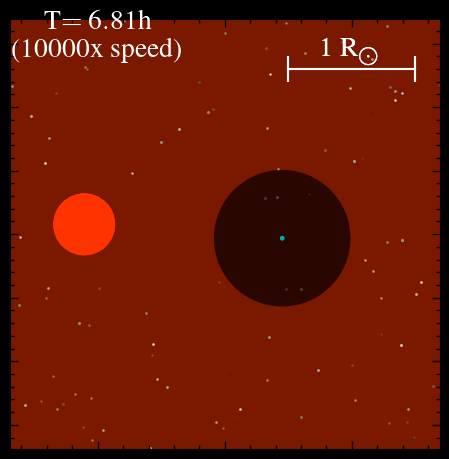

In [76]:
#plt.style.use("cyberpunk")
#rcParams["axes.linewidth"]=1

fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)


speedx = 10000
nframes = 90
windrad= np.tile([0,0.5,1,1.5,2,2.5], int((nframes/6))+1)

#fig.set_size_inches(7, 6.5)
plot_rad = 1.69
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

ax.set_aspect("equal")
patch1 = plt.Circle((0, a1), r1.value, fc='#08F7FE')
patch2 = plt.Circle((0, a2), r2.value, fc='#ff3300')

patch1a = plt.Circle((0, a1), r1.value*30, fc='k', alpha=0.3)
patch2a = plt.Circle((0, a2), r2.value*20, fc='#ff3300',alpha=0.2, zorder=-10)
# patch1a = plt.Circle((0, a1), r1.value*1.1, fc='#08F7FE', alpha=0.3)
# patch2a = plt.Circle((0, a2), r2.value*1.1, fc='#ff3300',alpha=0.3)


labely = 1.3
labelx= 0.5
plt.errorbar((labelx, labelx+1), (labely, labely), yerr=0.1, c='w')
plt.annotate(r'1 R$_{\bigodot}$', (labelx+0.5, labely+0.1), ha='center', c='w')

an = ax.annotate('', (labelx-1.5, labely+0.1), ha='center', c='w')


def init():
    patch1.center = (0, a1)
    patch2.center = (0, -a2)
    patch1a.center = (0, a1)
    patch2a.center = (0, -a2)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch1a)
    ax.add_patch(patch2a)
    return patch1, patch2, patch1a, patch2a

def animate(phi, windrad):
    x, y = patch1.center
    x, y = a1* np.cos(phi), a1*np.sin(phi)
    patch1.center = (x, y)
    patch1a.center = (x, y)
    x, y = patch2.center
    x, y = a2* np.cos(phi+np.pi), a2*np.sin(phi+np.pi)
    patch2.center = (x, y)
    patch2a.center = (x, y)
    tstep = 0
    if phi > 0:
        tstep = (p.value)*phi/(2*np.pi)
    an.set_text(r'T$={:.2f}$h'.format(tstep)+'\n'+'({}x speed)'.format(speedx))  
    return patch1, patch2, patch1a, patch2a, an

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, 360, endpoint=False), 
                               interval=20,
                               blit=True)

col= '#000033'
bgcol ='#000033'
col='k'
bgcol='k'
fig.patch.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.spines['bottom'].set_color(col)
ax.spines['top'].set_color(col) 
ax.spines['right'].set_color(col)
ax.spines['left'].set_color(col)
#plt.grid(zorder=-10)
# plt.xlabel(r'X (R$_{\bigodot}$)')
# plt.ylabel(r'Y (R$_{\bigodot}$)')
plt.xticks(visible=False)
plt.yticks(visible=False)

labely = 1.3
labelx= 0.5
plt.errorbar((labelx, labelx+1), (labely, labely), yerr=0.1, c='w')
plt.annotate(r'1 R$_{\bigodot}$', (labelx+0.5, labely+0.1), ha='center', c='w')



stars = make_stars(-plot_rad, plot_rad, -plot_rad, plot_rad)
for star in stars:
        alpha = np.random.uniform(0, 1)
        ax.scatter(star[0], star[1], s=star[2], alpha=alpha,
                   c='#ffffff', zorder=0)
        dark = np.random.uniform(0, .3)
        ax.scatter(star[0], star[1], s=star[2], alpha=dark,
                   c='#000000', zorder=0)
        
interval = (p.to(u.ms)/(nframes*speedx)).value
# print(interval)
        
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, nframes, endpoint=False), 
                               interval=interval,
                               blit=True, fargs=[windrad])

        
anim.save('animations/wind_circle_v3.gif', dpi=100, writer='imagemagick')
plt.show()

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

#anim.save('animations/test2.mp4', writer=writer)


In [164]:
68.818*1000

68818.0

In [151]:
# interval = (p.to(u.ms)/1000000).value
# print(interval)
# print(interval*360/1000)
# print(p.to(u.s).value/(interval*360/1000))

print((p.to(u.ms)/(360*1000)).value)

68.818
